In [89]:
import sys
sys.path.append('..')
from semcable.experiment import Experiment
from semcable.util import make_doc_word_matrix, get_corpus_text

In [90]:
words_of_interest = [
     'swamp', 'trump', 'environment', 'regulations',
     'regulators', 'economy', 'jobs', 'manufacturing', 'immigrant',
     'immigration', 'reform', 'drain', 'attack', 'hit', 'punch', 'clinton',
     'hillary', 'bill', 'donald', 'pelosi', 'ryan', 'paul', 'congress',
     'senate', 'obama', 'washington', 'dc', 'environment', 'epa',
     'lobbyists', 'lobbyist', 'lobbying', 'attacking', 'hitting', 'attacked',
     'lashed', 'punched', 'punching', 'isis', 'iraq', 'peace', 'war',
     'battle', 'fight', 'fought', 'unemployment', 'millenial', 'millenials',
     'vote', 'voting', 'voter', 'fraud', 'tax', 'taxes', 'returns']


In [91]:
texts = get_corpus_text('Three Months for Semantic Network Experiments', 'FOXNEWSW')
doc_word_mat, vocab = make_doc_word_matrix(texts)

all(word in vocab for word in words_of_interest)

True

In [15]:
[w for w in words_of_interest if w not in vocab]

[]

In [18]:
vocab = ['foo', 'bar', 'baz']

woi = ['bar', 'baz']

vocab_lookup = dict((w, i) for i, w in enumerate(vocab))

woi_idxs = [vocab_lookup[w] for w in woi]

a = np.array([[0, 1, 4], [2, 4, 5], [2, 67, 7]])
print(a)

[[ 0  1  4]
 [ 2  4  5]
 [ 2 67  7]]


In [21]:
a_woi = a[:, woi_idxs]
print(a_woi)

[[ 1  4]
 [ 4  5]
 [67  7]]


In [25]:
woi_indexes = dict((w, i) for i, w in enumerate(woi))

a_woi[:, woi_indexes['baz']]

array([4, 5, 7])

## Reading .tar.gz archives

In [1]:
from tarfile import TarFile

tf = TarFile.open('../data/fox_full.tar.gz')
tar_members = tf.getmembers()
print(tar_members)

[<TarInfo 'data/fox_full/degrees' at 0x10cbbb9a8>, <TarInfo 'data/fox_full/doc_word_mat.npy' at 0x10f3234f8>, <TarInfo 'data/fox_full/graph' at 0x10f3235c0>, <TarInfo 'data/fox_full/lda_params' at 0x10f323688>, <TarInfo 'data/fox_full/vocab' at 0x10f323750>, <TarInfo 'data/fox_full/woi_edgeweights.npy' at 0x10f323818>, <TarInfo 'data/fox_full/words_of_interest' at 0x10f3238e0>]


In [2]:
import pickle

degs = pickle.load(tf.extractfile(tar_members[0]))
print(type(degs))

<class 'numpy.ndarray'>


<Container object of 100 artists>

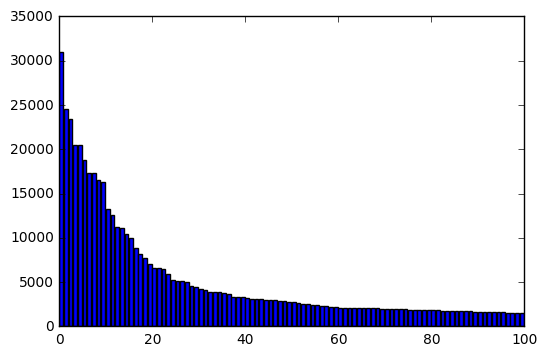

In [3]:
%matplotlib inline
plt.bar(range(len(degs[:100])), degs[:100])

In [13]:
print(degs.mean()/2.0)# why? I suppose because it's not a digraph, so... hmmmm
print(degs.min())
print(degs.max())
print(np.where(degs == 1))

11.6663714392
0
30953
(array([62078, 62079, 62080, 62081, 62082, 62083, 62084, 62085, 62086,
       62087, 62088, 62089, 62090, 62091, 62092, 62093, 62094, 62095]),)


In [10]:
mem_names = tf.getnames()
print(mem_names)

['data/fox_full/degrees', 'data/fox_full/doc_word_mat.npy', 'data/fox_full/graph', 'data/fox_full/lda_params', 'data/fox_full/vocab', 'data/fox_full/woi_edgeweights.npy', 'data/fox_full/words_of_interest']


In [8]:
from semcable.experiment import Results

ImportError: No module named 'semcable'

In [20]:
v = tf.extractfile('data/fox_full/vocab')
vocab = [el.decode('unicode_escape').strip() for el in v.readlines()]
print(vocab[:10])

['second', 'edition', 'kelly', 'pretty', 'fired', 'good', 'love', 'hear', 'see', 'welcome']


In [23]:
import sys
sys.version

'3.5.2 (default, Oct 11 2016, 05:05:28) \n[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]'

In [40]:
woie_ex = tf.extractfile('data/fox_full/woi_edgeweights.npy')

In [35]:
woie_ex.

bytes

In [36]:
woie = np.frombuffer(woie_ex)

In [ ]:
tf.extract('data/fox_full/woi_edgeweights.npy')
woie = np.load('data/fox_full/woi_edgeweights.npy')

In [42]:
ws = woie.shape
print(ws)
ws[0] * ws[1]

(62099, 55)


3415445

In [44]:
woie_ex = np.frombuffer(tf.extractfile('data/fox_full/woi_edgeweights.npy').read())
woie_ex.shape

(3415455,)

In [45]:
tf.extractall()

In [46]:
ls data/fox_full

degrees              lda_params           words_of_interest
doc_word_mat.npy     vocab
graph                woi_edgeweights.npy


In [48]:
import io
woie_direct = np.load(io.BytesIO(tf.extractfile('data/fox_full/woi_edgeweights.npy').read()))

In [49]:
woie_direct.shape

(62099, 55)

## Testing `Results` class

In [113]:
from semcable.experiment import Results

r = Results.from_tar('../data/fox_full.tar.gz')

In [115]:
r.fit_powerlaw()
print(r.power_law_coefficients)

[-1.41195461 -1.07115773]


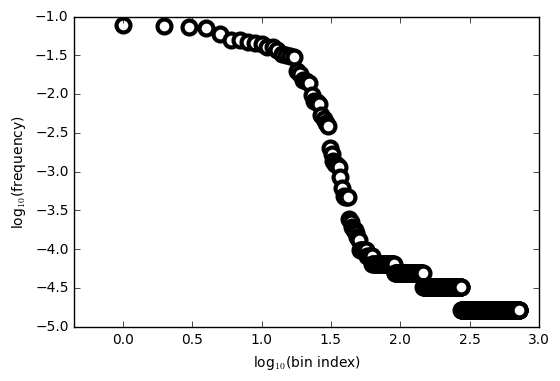

In [116]:
r.visualize_powerlaw_fit()

In [117]:
g = r.graph


In [100]:
print(len(g))
g.nodes()[:10]

62099


['sarkozy',
 'seoul',
 'xin',
 'diversities',
 'operators',
 'thnext',
 'pomegranate',
 'quested',
 'rescues',
 'vischa']

In [118]:
import networkx as nx

g = r.graph
vl = dict(enumerate(r.vocab))
g = nx.relabel_nodes(g, vl)

In [119]:
gov = g.subgraph(['government'] + list(g['government'].keys()))

In [120]:
print(len(gov.nodes()))
gov.nodes()

1354


['liberace',
 'mailman',
 'mitts',
 'snail',
 'bankrupted',
 'youthful',
 'assertive',
 'clump',
 'novice',
 'goal',
 'astronauts',
 'kurds',
 'dangero',
 'incurring',
 'snickers',
 'heighten',
 'ian',
 'mortgage',
 'wroer',
 'steagall',
 'clocked',
 'economists',
 'pesci',
 'space',
 'richards',
 'percoco',
 'tilts',
 'overwrite',
 'sperm',
 'renaissance',
 'ferrying',
 'unsolic',
 'marcia',
 'curing',
 'wort',
 'antirefugee',
 'magnolia',
 'exploration',
 'paully',
 'skips',
 'reeses',
 'concluding',
 'attaches',
 'foodstamps',
 'bombshelter',
 'risotto',
 'spain',
 'simplification',
 'flout',
 'rahm',
 'kangaroo',
 'miking',
 'preem',
 'diffu',
 'bradenton',
 'grisliest',
 'lapd',
 'inre',
 'streeters',
 'accuracy',
 'dagan',
 'burka',
 'wooreird',
 'kole',
 'spending',
 'shuffle',
 'weeny',
 'octopus',
 'chatted',
 'privatize',
 'groove',
 'caggiano',
 'bay',
 'shrugged',
 'reynolds',
 'orbital',
 'grocessly',
 'undis',
 'wl',
 'carbon',
 'stock',
 'trainers',
 'marketplaces',
 'so

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/message.c:4018)
KeyboardInterrupt


IndexError: list index out of range

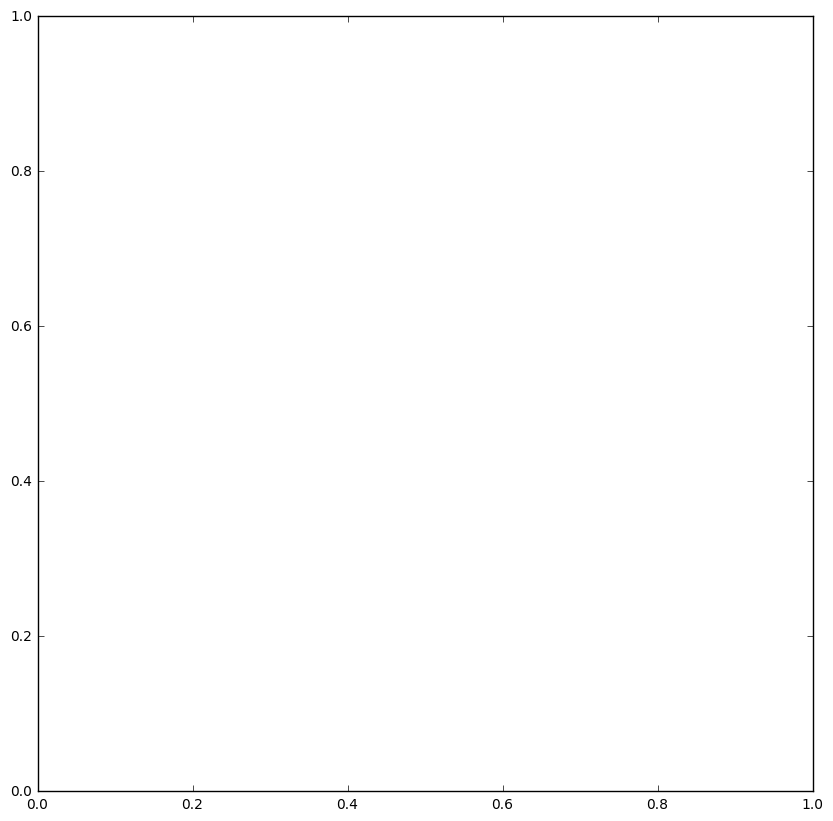

In [121]:
vis_graph(gov)

<Container object of 100 artists>

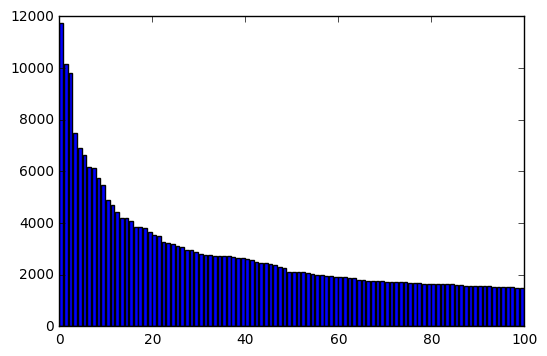

In [122]:
plt.bar(range(len(r.degs[:100])), r.degs[:100])

In [123]:
r.degs.mean()

23.225698413976332

In [129]:
def local_subgraph(g, word):
    return g.subgraph([word] + list(g[word].keys()))

epa = local_subgraph(g, 'epa')

16
1354


(<matplotlib.figure.Figure at 0x14c045128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14bfe1550>)

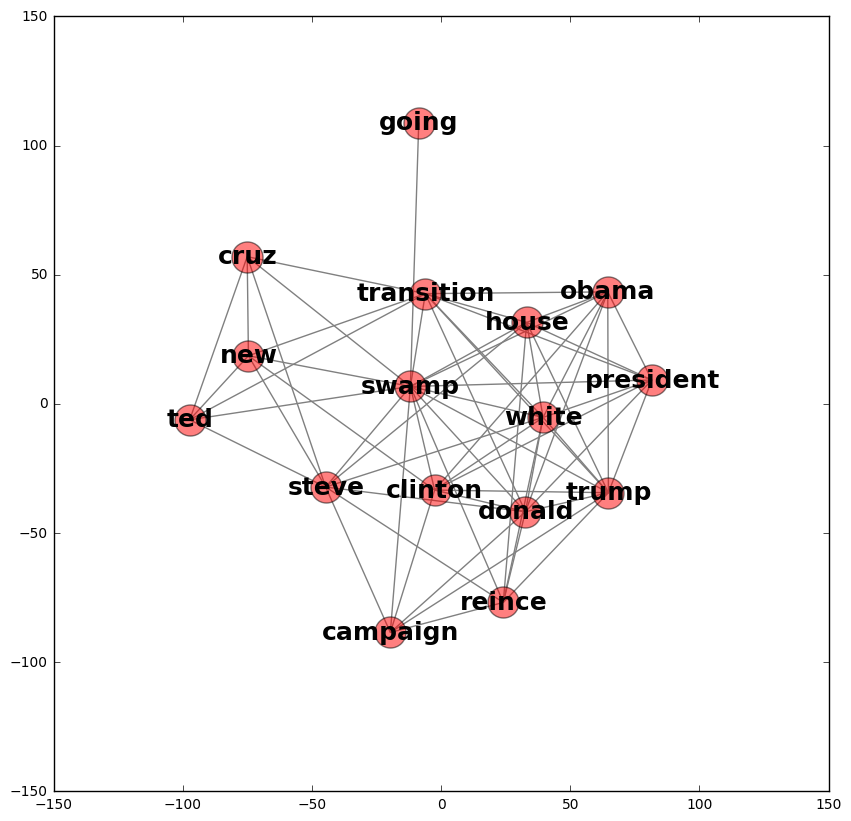

In [131]:
print(len(tr))
print(len(gov))

vis_graph(tr)

In [133]:
epa = local_subgraph(g, 'epa')
len(epa)

23

(<matplotlib.figure.Figure at 0x14ba146a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14bfe10b8>)

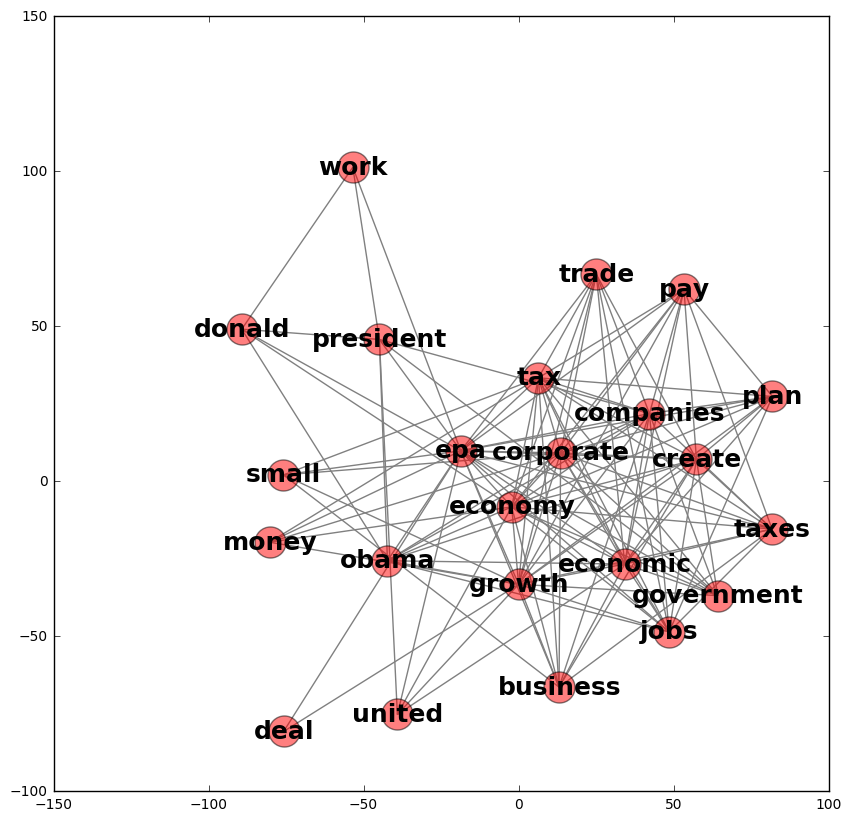

In [134]:
vis_graph(epa)

In [135]:
obama = local_subgraph(g, 'obama')
len(obama)

5752

In [139]:
env = local_subgraph(g, 'environmental')
len(env)

12

(<matplotlib.figure.Figure at 0x14b855438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14b851898>)

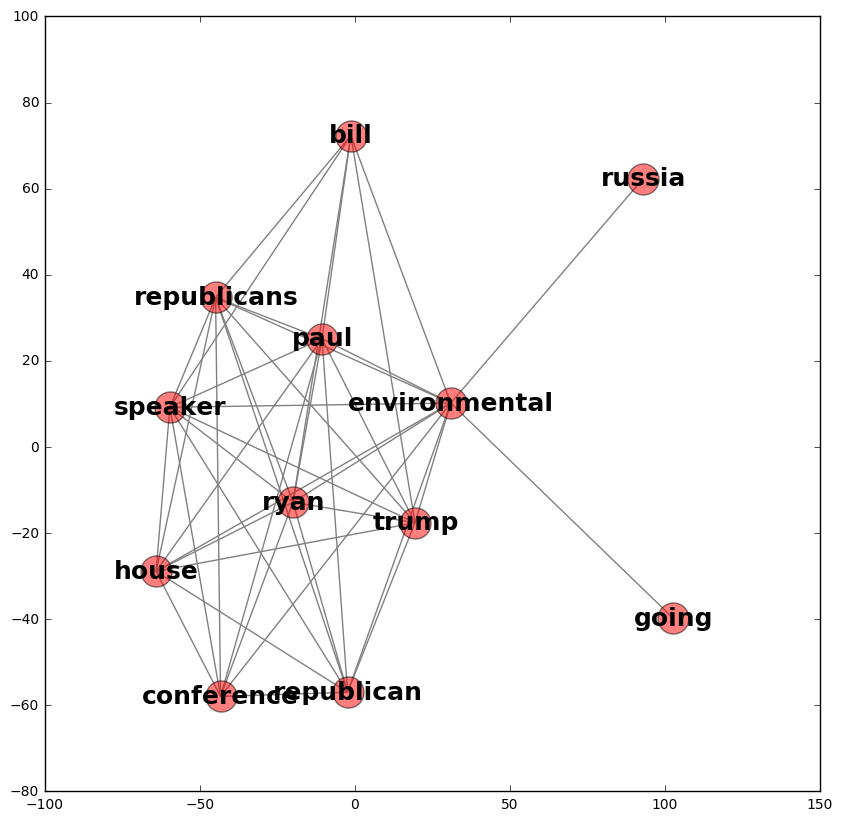

In [140]:
vis_graph(env)

In [141]:
rus = local_subgraph(g, 'russia')
len(rus)

1002

In [143]:
mex = local_subgraph(g, 'mexico')
len(mex)

863

In [147]:
dem = local_subgraph(g, 'president')
len(dem)

6903

(<matplotlib.figure.Figure at 0x14b58a2e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14b797cf8>)

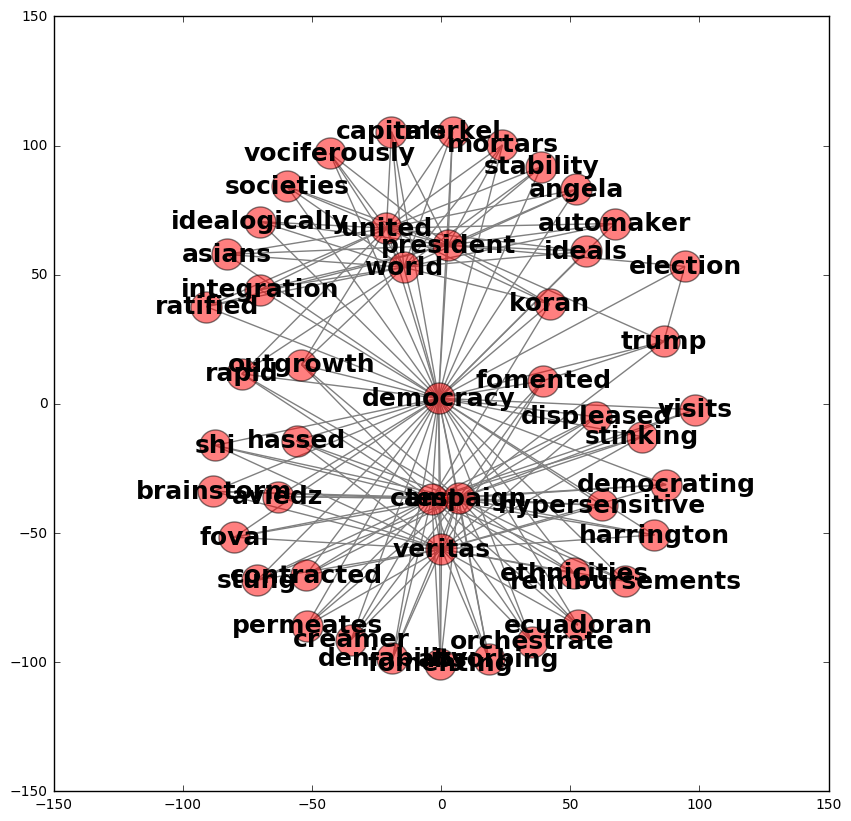

In [146]:
vis_graph(dem)

In [ ]:
words = ['campaign', 'trump', 'clinton', 'democracy', 'jobs', 'liberty', 'justice', 'black', 'equality']

[()]